In [24]:
import numpy as np
from numpy import linalg as LA
from sympy import *
from matplotlib import pyplot as plt

In [25]:
# Potential function
def u(m, w, x):
 return 0.5 * m * w**2 * x**2

# Initial gaussian function
def v(c, x):
 return exp(c * x**2)

# Normalization function
def norml(func, a, b):
 return integrate(func, (x, a, b))

# Psi1 (aka gaussian with norm. const)
def psi(A, c, x):
 return A * v(c, x)

# Hamiltonian operator function 
def H(func, m, h, w, x):
 deriv = diff(func, x, 2)
 return - (deriv * h**2) / (2 * m) + u(m, w, x) * func

# Step 2 (w_prime -> integrand to find alpha)
def w_prime(func, m, h, w, x):
 H_psi = H(func, m, h, w, x)
 return func * H_psi

def w1(func, m, h, w, x, alpha):
 return H(func, m, h, w, x) - alpha * func

# Function to tridiagonalize
def tridiag(a, b, c, k1=-1, k2=0, k3=1):
  return np.diag(a, k1) + np.diag(b, k2) + np.diag(c, k3)

In [26]:
# Lists
y, z = [], []
# Iteration num
n = 5
# Physical constants
x = symbols('x')
m = 1
h = 1
w = 1
c = - (m * w) / (2 * h)
# Normalization constant
A = sqrt(1 / norml(v(c, x)**2, -oo, oo))

In [27]:
# Finding alpha1
alpha = N(norml(w_prime(psi(A, c, x), m, h, w, x), -oo, oo), 3)
z.append(alpha)

In [28]:
beta1 = N(sqrt(norml(w1(psi(A, c, x), m, h, w, x, alpha)**2, -oo, oo)), 3)
y.append(beta1)

In [29]:
# Iterative part of lanczos algorithm (n-1 iterations)
j = n - 1
for i in range(j):
  psi1 = psi(A, c, x) / y[i - 1]
  alpha_n = N(norml(w_prime(psi(A, c, x), m, h, w, x), -oo, oo), 3)
  z.append(alpha_n)
  beta_n = N(sqrt(norml(w1(psi(A, c, x), m, h, w, x, alpha)**2, -oo, oo)), 3)
  # Reset
  if i < (j-1):
     y.append(beta_n)
  psi_2 = psi1 / beta_n
  psi1 = psi_2

In [30]:
T = tridiag(y, z, y)
T = T.astype('float64')
print(f'Tridiagonalization of A:\n{T}\n')
# Finding the eigenvalues w and eigenvectors v of the tri-diagonal matrix
s, t = LA.eig(T)
print(f'Associated eigenvalues:\n{s}\n')
print(f'Associated eigenvectors:\n{t}\n')

Tridiagonalization of A:
[[0.5 0.  0.  0.  0. ]
 [0.  0.5 0.  0.  0. ]
 [0.  0.  0.5 0.  0. ]
 [0.  0.  0.  0.5 0. ]
 [0.  0.  0.  0.  0.5]]

Associated eigenvalues:
[0.5 0.5 0.5 0.5 0.5]

Associated eigenvectors:
[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]



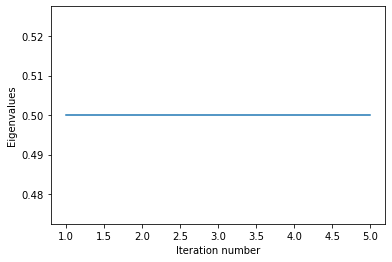

In [31]:
plot_y = np.asarray(s)
plot_x = np.asarray(range(1, n + 1))
plt.plot(plot_x, plot_y)
plt.xlabel('Iteration number')
plt.ylabel('Eigenvalues')
plt.show()

# Scrap:

In [ ]:
'''
we expect alpha to be 1/2, so no need to loop

usually, we track how much the alpha value changes. if it changes by less than 0.01%, it will have converged and we can stop the loop.

no need to track beta value, it's just there for the ride

we expect alpha to change a lot at first, then slowly change less and less v quickly, should not be linear change

we want to generalize psi, rn psi is a Gaussian, we should have a normalization constant C times a function psi. generalize lanczos() to only take C and psi

0.5 is the ground state, should get 3.5, 5.5, 7.5, etc. from loop (excited states)

plot eigenvalues vs iterations 

in LaTeX: how/why does Lanczos algorithm work, and some pseudo code of what our algorithms do
'''

import sympy as sym
import numpy as np
import math

def gaussian(m, omega, hbar, x):
  return sym.exp(-(m * omega) / (2 * hbar) * (x ** 2))

def normalize_gauss(psi0, C, x):
  a, b = sym.solve((C ** 2) * sym.integrate((sym.Abs(psi0 / C) ** 2), (x, -sym.oo, sym.oo)) - 1, C)
  psi1 = b * (psi0 / C)
  return psi1, b

def hamiltonian(m, omega, hbar, psi1, x):
  return (-(hbar ** 2) / (2 * m)) * (sym.diff(psi1, x, 2)) + (0.5 * m * (omega ** 2) * (x ** 2) * psi1)

def tridiag(a, b, c, k1=-1, k2=0, k3=1):
  return np.diag(a, k1) + np.diag(b, k2) + np.diag(c, k3)

def lanczos(m, omega, hbar, C, x):
  a, b = [], []
 
  psi0 = C * gaussian(m, omega, hbar, x)
  psi1, C = normalize_gauss(psi0, C, x)

  for i in range(1):
    w_prime = hamiltonian(m, omega, hbar, psi1, x)
    alpha1 = sym.integrate(psi1 * w_prime, (x, -sym.oo, sym.oo))
    a.append(alpha1)
    
    psi2 = w_prime - (alpha1 * psi1)
    beta2 = math.sqrt(sym.integrate((sym.Abs(psi2) ** 2), (x, -sym.oo, sym.oo)))
    b.append(beta2)

    psi1 = psi2/beta2

  return tridiag(a, b, a)


m, omega, hbar = 1, 1, 1
C, x = sym.Symbol('C'), sym.Symbol('x')

T = lanczos(m, omega, hbar, C, x)
print(T)

In [ ]:
'''
we expect alpha to change a lot at first, then slowly change less and less v quickly, should not be linear change

we want to generalize psi, rn psi is a Gaussian, we should have a normalization constant C times a function psi. generalize lanczos() to only take C and psi

0.5 is the ground state, should get 3.5, 5.5, 7.5, etc. from loop (excited states)

plot eigenvalues vs iterations 

in LaTeX: how/why does Lanczos algorithm work, and some pseudo code of what our algorithms do
'''

import sympy as sym
import numpy as np
import math

def gaussian(m, omega, hbar, x):
  return sym.exp(-(m * omega) / (2 * hbar) * (x ** 2))

def normalize_gauss(psi0, C, x):
  a, b = sym.solve((C ** 2) * sym.integrate((sym.Abs(psi0 / C) ** 2), (x, -sym.oo, sym.oo)) - 1, C)
  psi1 = b * (psi0 / C)
  return psi1, b

def hamiltonian(m, omega, hbar, psi1, x):
  return (-(hbar ** 2) / (2 * m)) * (sym.diff(psi1, x, 2)) + (0.5 * m * (omega ** 2) * (x ** 2) * psi1)

def tridiag(a, b, c, k1=-1, k2=0, k3=1):
  return np.diag(a, k1) + np.diag(b, k2) + np.diag(c, k3)

def lanczos(m, omega, hbar, C, x):
  a, b = [], []
 
  psi0 = C * gaussian(m, omega, hbar, x)
  psi1, C = normalize_gauss(psi0, C, x)

  #index, delta = 0, 0
  #while(True):
  for i in range (10):
    w_prime = hamiltonian(m, omega, hbar, psi1, x)
    alpha1 = sym.integrate(psi1 * w_prime, (x, -sym.oo, sym.oo))
    a.append(alpha1)
        
    psi2 = w_prime - (alpha1 * psi1)
    beta2 = math.sqrt(sym.integrate((sym.Abs(psi2) ** 2), (x, -sym.oo, sym.oo)))
    b.append(beta2)

    psi1 = psi2/beta2
    '''
    if index != 0:
        delta = a[index] / a[index - 1] * 100
        if delta <= 0.01:
            b.pop()
            return tridiag(b, a, b)

    index += 1
    '''
    return tridiag(b, a, b)
  

m, omega, hbar = 1, 1, 1
C, x = sym.Symbol('C'), sym.Symbol('x')

T = lanczos(m, omega, hbar, C, x)
print(T)
w = np.linalg.eig(T)
print(w)